In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Step 1: Reading and Understanding the Data

In [2]:
# read the data from csv file and load it into data frame called data
data = pd.read_csv('./day.csv')

# see the data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# get rows and columns
data.shape

(730, 16)

In [4]:
# as you can see from above data 'instant' column is just like an index
# so removing the 'instant' column as it will not contribute anythin to model
data = data.drop(columns=['instant'])
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Since we have the month and the Year in two seperate columns, we do not need the date column anymore, thus dropping it
data.drop('dteday', inplace=True, axis = 1)

Since the Model is to be built for <b>cnt</b> column, <b>casual</b> and <b>registed</b> are redundant here. It should not be used to build the model, thus dropping these two columns before further processing.

In [6]:
# as 'cnt' varibale is combination of causal and registerd and we are predicting the 'cnt'
# so columns 'causal' and ''registerd' can be dropped 'cnt' is target variable
data = data.drop(columns=['casual', 'registered'])
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# checking the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [8]:
# converting the actual caterhorical variables from numerical to categorical
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
data[cat_vars] = data[cat_vars].astype(object)

In [9]:
# checking the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


As from the above info we can see all columns doesnot have any missing values and all are non-null. so null value checking is not required in this case

In [10]:
# Converting the seasons variable values into their actual string values 
data['season'] = data['season'].replace([1, 2, 3, 4],['spring', 'summer', 'fall', 'winter'])
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Converting the weather variable values into their actual string values
data['weathersit'] = data['weathersit'].replace([1, 2, 3, 4],['Clear', 'Misty+Cloudy', 'Light Snow/Rain', 'Heavy Snow/Rain'])
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Misty+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Misty+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
data.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

#### Visualising Numeric Variables

Plot a pairplot of all the numeric variables

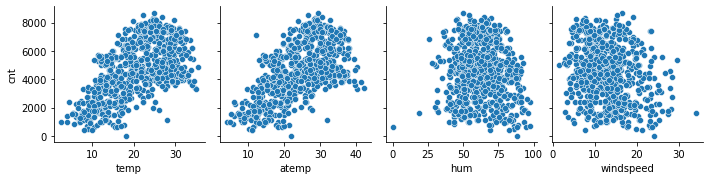

In [13]:
# Checking linear relationship between the cnt variable and other numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
x = sns.pairplot(data, x_vars=num_vars, y_vars=['cnt'])
plt.show()

From the above plot we can see that cnt is having linear relationship with temp and atemp, where as humidity and windspeed is not having much linear and the data is spread across

#### Visualising Categorical Variables


In [14]:
cat_vars

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

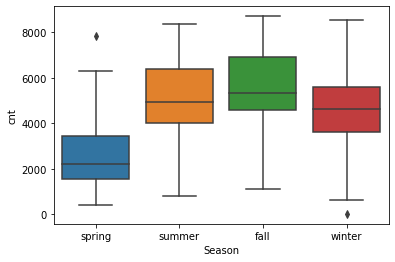

In [15]:
# plot season vs cnt variable 
sns.boxplot(x='season', y='cnt', data=data)
plt.xlabel('Season')
plt.show()

So from the above plot it is observed that for summer and fall season the Count is more

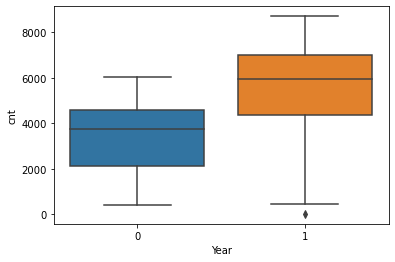

In [16]:
# plot Year vs cnt variable 
sns.boxplot(x='yr', y='cnt', data=data)
plt.xlabel('Year')
plt.show()

So from the above plot it is observed that for year 2019 Count is more

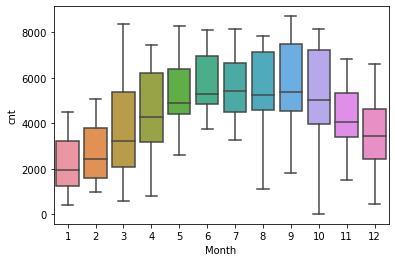

In [17]:
# plot Month vs cnt variable 
sns.boxplot(x='mnth', y='cnt', data=data)
plt.xlabel('Month')
plt.show()

So from the above plot it is observed that there is demand is increasing from March to September. So these months count will be more as they falls under summer and fall season. 

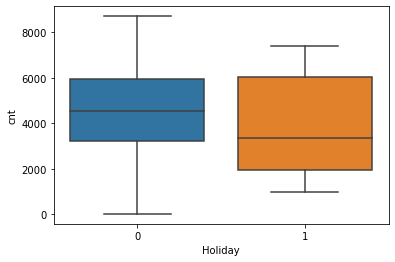

In [18]:
# plot holiday vs cnt variable 
sns.boxplot(x='holiday', y='cnt', data=data)
plt.xlabel('Holiday')
plt.show()

So from the above plot it is observed that holiday is not making any differnce in count

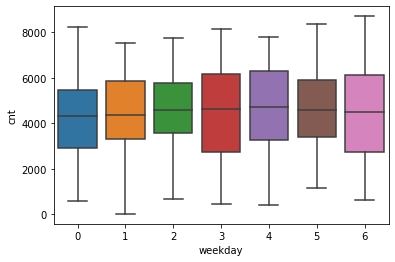

In [19]:
# plot weekday vs cnt variable 
sns.boxplot(x='weekday', y='cnt', data=data)
plt.xlabel('weekday')
plt.show()

So from the above plot it is observed that Thursday and Friday is count is slightly more compare to other days

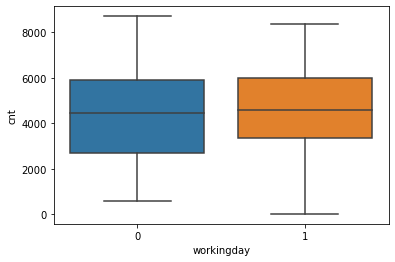

In [20]:
# plot workingday vs cnt variable 
sns.boxplot(x='workingday', y='cnt', data=data)
plt.xlabel('workingday')
plt.show()

So from the above plot it is observed that workingday or not is not making any differnce in count

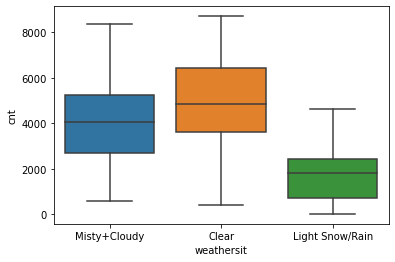

In [21]:
# plot weathersit vs cnt variable 
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.xlabel('weathersit')
plt.show()

So from the above plot it is observed that for clear weathersit day count is more

## Step 3: Data Preparation

In [22]:
# create dummpy variables for categorical variables
dummy = pd.get_dummies(data[cat_vars], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [23]:
# now merge this dummy varibales to actual data frame and remove the categorical variables
data = pd.concat([data, dummy], axis=1)   #Axis=1 is for horizontal stacking
data = data.drop(columns=cat_vars, axis=1)
data.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [24]:
# get the number of rows and columns
data.shape

(730, 30)

In [25]:
data.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [26]:
np.random.seed(0)
# split data int0 70:30 
df_train, df_test = train_test_split(data, train_size=0.7, test_size = 0.3, random_state=100)

In [27]:
print('Training data shape: ' , df_train.shape)
print('test data shape: ' , df_test.shape)

Training data shape:  (510, 30)
test data shape:  (219, 30)


In [28]:
# Checking the Train Data
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
653,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
576,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
426,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
728,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
482,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [29]:
# Checking the Test Data
df_test.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
184,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
535,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
221,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
152,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


### Rescaling the Features 

In [30]:
# apply min max scaling on the data

#Instantiating scalar object
scaler = MinMaxScaler()

# get the columns of traing data frame
cols = df_train.columns

# fit and transform the data
df_train[cols] = scaler.fit_transform(df_train[cols])

In [31]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.066667,...,0.025490,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.676471,0.029412,0.343137
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.249689,...,0.157763,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.468282,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
653,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
728,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


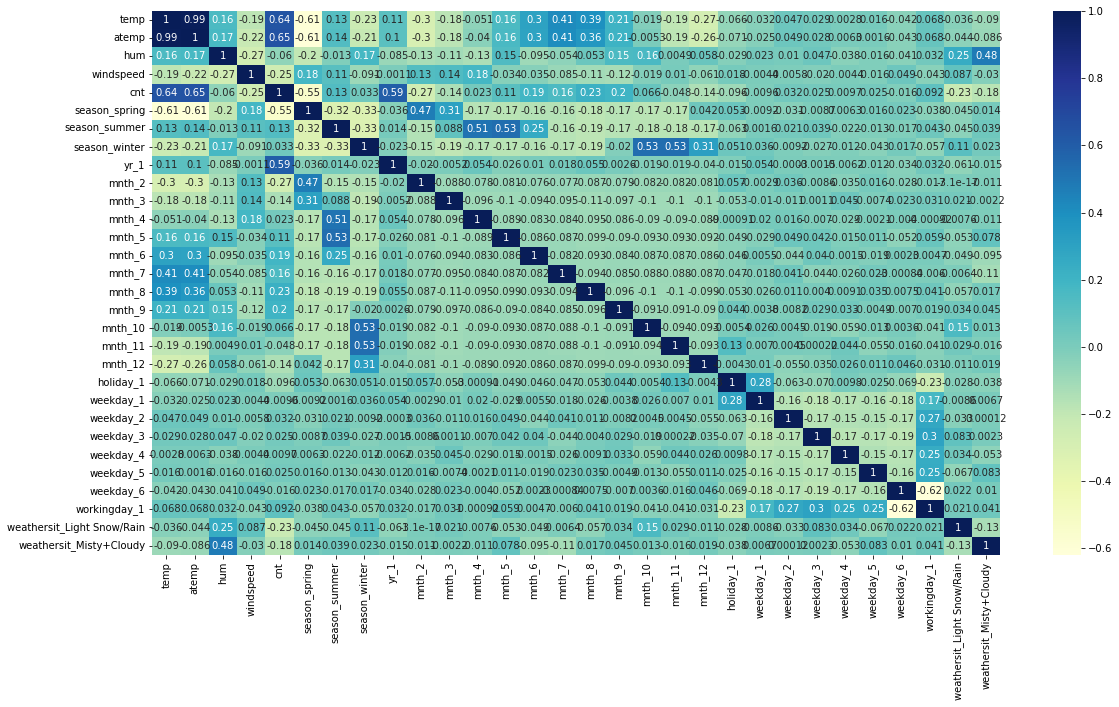

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (19,10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above plot temp and atemp is highly correlated to cnt compare to other variables.
Lets plot pair plot of them with cnt

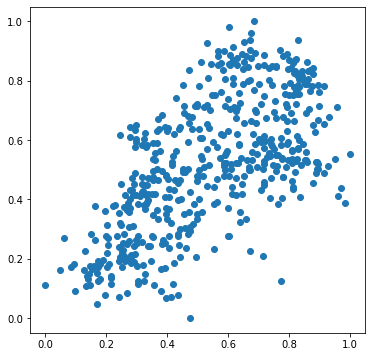

In [34]:
# plot temp vs cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

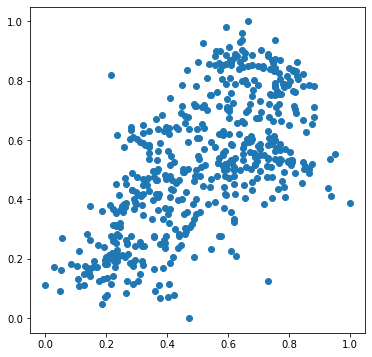

In [35]:
# plot atemp vs cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

From the above two plots temp and atemp having veru good linear relation ship with cnt variable.

## Step 5: Building a linear model
Since the number of columns is 29, which is manageable, we first build a model with all the columns, and then keep removing the columns based upon Statistical Significance and Co-Linearity. <br>
Here I am using Stats model to achieve this

In [36]:
# separate x and y variables
y_train = df_train.pop('cnt')
X_train = df_train

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit 
lr_model1 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sat, 28 May 2022   Prob (F-statistic):          8.42e-181
Time:                        21:14:36   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2242      0.043      5.264      0.000       0.141       0.308
temp                           0.4013      0.142      2.821      0.005       0.122       0.681
atemp                          0.0506      0.138      0.366      0.714      -0.221       0.322
hum                           -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed                     -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring                 -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer                  0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter                  0.1054      0.028      3.770      0.000       0.050       0.160
yr_1                           0.2322      0.008     28.792      0.000       0.216       0.248
mnth_2                         0.0304      0.021      1.474      0.141      -0.010       0.071
mnth_3                         0.0639      0.022      2.857      0.004       0.020       0.108
mnth_4                         0.0626      0.034      1.864      0.063      -0.003       0.129
mnth_5                         0.0873      0.036      2.412      0.016       0.016       0.158
mnth_6                         0.0609      0.039      1.556      0.120      -0.016       0.138
mnth_7                         0.0233      0.044      0.529      0.597      -0.063       0.110
mnth_8                         0.0786      0.042      1.873      0.062      -0.004       0.161
mnth_9                         0.1444      0.037      3.853      0.000       0.071       0.218
mnth_10                        0.0703      0.034      2.041      0.042       0.003       0.138
mnth_11                        0.0208      0.033      0.633      0.527      -0.044       0.085
mnth_12                        0.0170      0.027      0.641      0.522      -0.035       0.069
holiday_1                     -0.0424      0.024     -1.793      0.074      -0.089       0.004
weekday_1                     -0.0099      0.010     -1.023      0.307      -0.029       0.009
weekday_2                     -0.0078      0.011     -0.695      0.488      -0.030       0.014
weekday_3                      0.0058      0.011      0.554      0.580      -0.015       0.026
weekday_4                      0.0018      0.011      0.165      0.869      -0.020       0.023
weekday_5                      0.0116      0.011      1.031      0.303      -0.010       0.034
weekday_6                      0.0545      0.015      3.757      0.000       0.026       0.083
workingday_1                   0.0439      0.009      4.689      0.000       0.025       0.062
weathersit_Light Snow/Rain    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
weathersit_Misty+Cloudy       -0.0610      

The R-squared is a significant 85%, but there are insignificant variables and variables with strong multicollinearity. We need to get rid of them, in the following cells, we will follow the same process in an itrative manner till we build a robust model. First we will remove all columns with High P Values and then when the P Values are acceptable for all the columns, we will check their VIF and remove them.

In [37]:
# Removing 'weekday_4' which is having high P-Value of 0.869 as it is far greater than parameter significance level of 5%
X_train = X_train.drop('weekday_4', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit 
lr_model2 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sat, 28 May 2022   Prob (F-statistic):          8.42e-181
Time:                        21:14:37   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2242      0.043      5.264      0.000       0.141       0.308
temp                           0.4013      0.142      2.821      0.005       0.122       0.681
atemp                          0.0506      0.138      0.366      0.714      -0.221       0.322
hum                           -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed                     -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_spring                 -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_summer                  0.0382      0.026      1.455      0.146      -0.013       0.090
season_winter                  0.1054      0.028      3.770      0.000       0.050       0.160
yr_1                           0.2322      0.008     28.792      0.000       0.216       0.248
mnth_2                         0.0304      0.021      1.474      0.141      -0.010       0.071
mnth_3                         0.0639      0.022      2.857      0.004       0.020       0.108
mnth_4                         0.0626      0.034      1.864      0.063      -0.003       0.129
mnth_5                         0.0873      0.036      2.412      0.016       0.016       0.158
mnth_6                         0.0609      0.039      1.556      0.120      -0.016       0.138
mnth_7                         0.0233      0.044      0.529      0.597      -0.063       0.110
mnth_8                         0.0786      0.042      1.873      0.062      -0.004       0.161
mnth_9                         0.1444      0.037      3.853      0.000       0.071       0.218
mnth_10                        0.0703      0.034      2.041      0.042       0.003       0.138
mnth_11                        0.0208      0.033      0.633      0.527      -0.044       0.085
mnth_12                        0.0170      0.027      0.641      0.522      -0.035       0.069
holiday_1                     -0.0406      0.030     -1.351      0.177      -0.100       0.018
weekday_1                     -0.0118      0.015     -0.777      0.437      -0.041       0.018
weekday_2                     -0.0096      0.015     -0.620      0.535      -0.040       0.021
weekday_3                      0.0040      0.015      0.274      0.784      -0.025       0.033
weekday_5                      0.0097      0.016      0.625      0.532      -0.021       0.040
weekday_6                      0.0545      0.015      3.757      0.000       0.026       0.083
workingday_1                   0.0457      0.015      3.016      0.003       0.016       0.075
weathersit_Light Snow/Rain    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
weathersit_Misty+Cloudy       -0.0610      0.010     -5.845      0.000      -0.082      -0.041
===========================================

In [38]:
# Removing 'weekday_3' which is having high P-Value as it is greater than parameter significance level of 5%
X_train = X_train.drop('weekday_3', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit 
lr_model3 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sat, 28 May 2022   Prob (F-statistic):          8.49e-182
Time:                        21:14:38   Log-Likelihood:                 527.99
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2237      0.043      5.262      0.000       0.140       0.307
temp                           0.4023      0.142      2.832      0.005       0.123       0.681
atemp                          0.0494      0.138      0.358      0.720      -0.222       0.321
hum                           -0.1515      0.038     -3.936      0.000      -0.227      -0.076
windspeed                     -0.1845      0.026     -7.014      0.000      -0.236      -0.133
season_spring                 -0.0483      0.030     -1.611      0.108      -0.107       0.011
season_summer                  0.0384      0.026      1.464      0.144      -0.013       0.090
season_winter                  0.1057      0.028      3.787      0.000       0.051       0.161
yr_1                           0.2322      0.008     28.821      0.000       0.216       0.248
mnth_2                         0.0305      0.021      1.482      0.139      -0.010       0.071
mnth_3                         0.0638      0.022      2.858      0.004       0.020       0.108
mnth_4                         0.0628      0.034      1.874      0.062      -0.003       0.129
mnth_5                         0.0875      0.036      2.422      0.016       0.017       0.158
mnth_6                         0.0612      0.039      1.567      0.118      -0.016       0.138
mnth_7                         0.0236      0.044      0.537      0.592      -0.063       0.110
mnth_8                         0.0789      0.042      1.883      0.060      -0.003       0.161
mnth_9                         0.1446      0.037      3.863      0.000       0.071       0.218
mnth_10                        0.0704      0.034      2.046      0.041       0.003       0.138
mnth_11                        0.0207      0.033      0.631      0.528      -0.044       0.085
mnth_12                        0.0169      0.026      0.637      0.525      -0.035       0.069
holiday_1                     -0.0387      0.029     -1.325      0.186      -0.096       0.019
weekday_1                     -0.0139      0.013     -1.077      0.282      -0.039       0.011
weekday_2                     -0.0118      0.013     -0.895      0.371      -0.038       0.014
weekday_5                      0.0076      0.013      0.565      0.572      -0.019       0.034
weekday_6                      0.0545      0.015      3.762      0.000       0.026       0.083
workingday_1                   0.0479      0.013      3.734      0.000       0.023       0.073
weathersit_Light Snow/Rain    -0.2566      0.026     -9.718      0.000      -0.308      -0.205
weathersit_Misty+Cloudy       -0.0610      0.010     -5.847      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       85.557   Durbin-Watson:     

In [39]:
# Removing 'atemp' which is having high P-Value as it is greater than parameter significance level of 5%
X_train = X_train.drop('atemp', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit 
lr_model4 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sat, 28 May 2022   Prob (F-statistic):          8.61e-183
Time:                        21:14:39   Log-Likelihood:                 527.92
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2237      0.042      5.266      0.000       0.140       0.307
temp                           0.4504      0.046      9.741      0.000       0.360       0.541
hum                           -0.1510      0.038     -3.930      0.000      -0.226      -0.076
windspeed                     -0.1865      0.026     -7.265      0.000      -0.237      -0.136
season_spring                 -0.0479      0.030     -1.600      0.110      -0.107       0.011
season_summer                  0.0389      0.026      1.486      0.138      -0.013       0.090
season_winter                  0.1061      0.028      3.810      0.000       0.051       0.161
yr_1                           0.2321      0.008     28.850      0.000       0.216       0.248
mnth_2                         0.0306      0.021      1.488      0.137      -0.010       0.071
mnth_3                         0.0638      0.022      2.859      0.004       0.020       0.108
mnth_4                         0.0630      0.033      1.881      0.061      -0.003       0.129
mnth_5                         0.0870      0.036      2.412      0.016       0.016       0.158
mnth_6                         0.0602      0.039      1.546      0.123      -0.016       0.137
mnth_7                         0.0228      0.044      0.519      0.604      -0.063       0.109
mnth_8                         0.0775      0.042      1.859      0.064      -0.004       0.159
mnth_9                         0.1441      0.037      3.856      0.000       0.071       0.217
mnth_10                        0.0704      0.034      2.049      0.041       0.003       0.138
mnth_11                        0.0209      0.033      0.636      0.525      -0.044       0.085
mnth_12                        0.0171      0.026      0.645      0.519      -0.035       0.069
holiday_1                     -0.0393      0.029     -1.349      0.178      -0.097       0.018
weekday_1                     -0.0137      0.013     -1.065      0.287      -0.039       0.012
weekday_2                     -0.0118      0.013     -0.896      0.371      -0.038       0.014
weekday_5                      0.0071      0.013      0.537      0.591      -0.019       0.033
weekday_6                      0.0546      0.014      3.765      0.000       0.026       0.083
workingday_1                   0.0479      0.013      3.739      0.000       0.023       0.073
weathersit_Light Snow/Rain    -0.2573      0.026     -9.784      0.000      -0.309      -0.206
weathersit_Misty+Cloudy       -0.0610      0.010     -5.857      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.887   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.

In [40]:
# Removing 'weekday_5' which is having high P-Value as it is greater than parameter significance level of 5%
X_train = X_train.drop('weekday_5', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit 
lr_model5 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sat, 28 May 2022   Prob (F-statistic):          9.26e-184
Time:                        21:14:39   Log-Likelihood:                 527.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2241      0.042      5.281      0.000       0.141       0.307
temp                           0.4500      0.046      9.741      0.000       0.359       0.541
hum                           -0.1517      0.038     -3.953      0.000      -0.227      -0.076
windspeed                     -0.1865      0.026     -7.271      0.000      -0.237      -0.136
season_spring                 -0.0479      0.030     -1.603      0.110      -0.107       0.011
season_summer                  0.0387      0.026      1.480      0.140      -0.013       0.090
season_winter                  0.1062      0.028      3.817      0.000       0.052       0.161
yr_1                           0.2321      0.008     28.867      0.000       0.216       0.248
mnth_2                         0.0309      0.021      1.503      0.134      -0.009       0.071
mnth_3                         0.0638      0.022      2.863      0.004       0.020       0.108
mnth_4                         0.0634      0.033      1.894      0.059      -0.002       0.129
mnth_5                         0.0873      0.036      2.423      0.016       0.017       0.158
mnth_6                         0.0603      0.039      1.552      0.121      -0.016       0.137
mnth_7                         0.0234      0.044      0.534      0.593      -0.063       0.110
mnth_8                         0.0779      0.042      1.870      0.062      -0.004       0.160
mnth_9                         0.1441      0.037      3.859      0.000       0.071       0.217
mnth_10                        0.0707      0.034      2.059      0.040       0.003       0.138
mnth_11                        0.0204      0.033      0.624      0.533      -0.044       0.085
mnth_12                        0.0171      0.026      0.648      0.517      -0.035       0.069
holiday_1                     -0.0369      0.029     -1.283      0.200      -0.094       0.020
weekday_1                     -0.0159      0.012     -1.305      0.193      -0.040       0.008
weekday_2                     -0.0140      0.012     -1.122      0.262      -0.038       0.011
weekday_6                      0.0545      0.014      3.768      0.000       0.026       0.083
workingday_1                   0.0501      0.012      4.129      0.000       0.026       0.074
weathersit_Light Snow/Rain    -0.2583      0.026     -9.849      0.000      -0.310      -0.207
weathersit_Misty+Cloudy       -0.0606      0.010     -5.837      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       84.536   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.621
Skew:                          -0.803   Prob(JB):                     4.15e-52
Kurtosis:   

In [41]:
# Removing 'mnth_7' which is having high P-Value as it is greater than parameter significance level of 5%
X_train = X_train.drop('mnth_7', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object
lr = sm.OLS(y_train, X_train_sm)

# instantiate the model object and fit 
lr_model6 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.4
Date:                Sat, 28 May 2022   Prob (F-statistic):          9.74e-185
Time:                        21:14:40   Log-Likelihood:                 527.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     485   BIC:                            -899.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2346      0.038      6.243      0.000       0.161       0.308
temp                           0.4645      0.037     12.430      0.000       0.391       0.538
hum                           -0.1543      0.038     -4.059      0.000      -0.229      -0.080
windspeed                     -0.1864      0.026     -7.272      0.000      -0.237      -0.136
season_spring                 -0.0575      0.024     -2.396      0.017      -0.105      -0.010
season_summer                  0.0339      0.025      1.381      0.168      -0.014       0.082
season_winter                  0.1010      0.026      3.880      0.000       0.050       0.152
yr_1                           0.2317      0.008     28.958      0.000       0.216       0.247
mnth_2                         0.0276      0.020      1.409      0.160      -0.011       0.066
mnth_3                         0.0570      0.018      3.119      0.002       0.021       0.093
mnth_4                         0.0523      0.026      1.992      0.047       0.001       0.104
mnth_5                         0.0743      0.027      2.797      0.005       0.022       0.127
mnth_6                         0.0435      0.023      1.907      0.057      -0.001       0.088
mnth_8                         0.0579      0.018      3.176      0.002       0.022       0.094
mnth_9                         0.1269      0.019      6.670      0.000       0.090       0.164
mnth_10                        0.0600      0.028      2.152      0.032       0.005       0.115
mnth_11                        0.0116      0.028      0.410      0.682      -0.044       0.067
mnth_12                        0.0104      0.023      0.448      0.654      -0.035       0.056
holiday_1                     -0.0381      0.029     -1.330      0.184      -0.094       0.018
weekday_1                     -0.0158      0.012     -1.296      0.196      -0.040       0.008
weekday_2                     -0.0139      0.012     -1.114      0.266      -0.038       0.011
weekday_6                      0.0545      0.014      3.769      0.000       0.026       0.083
workingday_1                   0.0497      0.012      4.107      0.000       0.026       0.073
weathersit_Light Snow/Rain    -0.2576      0.026     -9.843      0.000      -0.309      -0.206
weathersit_Misty+Cloudy       -0.0603      0.010     -5.822      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       82.825   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.790
Skew:                          -0.793   Prob(JB):                     3.44e-50
Kurtosis:                       5.865   Cond. No.                         25.2
============================

In [42]:
# Removing 'mnth_11' which is having high P-Value as it is greater than parameter significance level of 5%
X_train = X_train.drop('mnth_11', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit 
lr_model7 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sat, 28 May 2022   Prob (F-statistic):          9.45e-186
Time:                        21:14:40   Log-Likelihood:                 527.53
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     486   BIC:                            -905.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2368      0.037      6.369      0.000       0.164       0.310
temp                           0.4624      0.037     12.507      0.000       0.390       0.535
hum                           -0.1534      0.038     -4.046      0.000      -0.228      -0.079
windspeed                     -0.1852      0.025     -7.278      0.000      -0.235      -0.135
season_spring                 -0.0585      0.024     -2.452      0.015      -0.105      -0.012
season_summer                  0.0333      0.024      1.359      0.175      -0.015       0.081
season_winter                  0.1077      0.020      5.315      0.000       0.068       0.147
yr_1                           0.2316      0.008     28.980      0.000       0.216       0.247
mnth_2                         0.0261      0.019      1.357      0.176      -0.012       0.064
mnth_3                         0.0557      0.018      3.097      0.002       0.020       0.091
mnth_4                         0.0509      0.026      1.958      0.051      -0.000       0.102
mnth_5                         0.0733      0.026      2.774      0.006       0.021       0.125
mnth_6                         0.0426      0.023      1.878      0.061      -0.002       0.087
mnth_8                         0.0566      0.018      3.154      0.002       0.021       0.092
mnth_9                         0.1239      0.018      7.069      0.000       0.089       0.158
mnth_10                        0.0513      0.018      2.813      0.005       0.015       0.087
mnth_12                        0.0037      0.017      0.226      0.821      -0.029       0.036
holiday_1                     -0.0366      0.028     -1.288      0.198      -0.092       0.019
weekday_1                     -0.0162      0.012     -1.328      0.185      -0.040       0.008
weekday_2                     -0.0140      0.012     -1.125      0.261      -0.038       0.010
weekday_6                      0.0544      0.014      3.765      0.000       0.026       0.083
workingday_1                   0.0498      0.012      4.115      0.000       0.026       0.074
weathersit_Light Snow/Rain    -0.2577      0.026     -9.853      0.000      -0.309      -0.206
weathersit_Misty+Cloudy       -0.0605      0.010     -5.854      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       82.496   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.051
Skew:                          -0.789   Prob(JB):                     4.97e-50
Kurtosis:                       5.862   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the 

In [43]:
# Removing 'mnth_12' which is having high P-Value as it is greater than parameter significance level of 5%
X_train = X_train.drop('mnth_12', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit 
lr_model8 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.5
Date:                Sat, 28 May 2022   Prob (F-statistic):          8.44e-187
Time:                        21:14:41   Log-Likelihood:                 527.50
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     487   BIC:                            -911.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2372      0.037      6.397      0.000       0.164       0.310
temp                           0.4615      0.037     12.563      0.000       0.389       0.534
hum                           -0.1526      0.038     -4.046      0.000      -0.227      -0.079
windspeed                     -0.1853      0.025     -7.289      0.000      -0.235      -0.135
season_spring                 -0.0583      0.024     -2.450      0.015      -0.105      -0.012
season_summer                  0.0333      0.024      1.361      0.174      -0.015       0.081
season_winter                  0.1085      0.020      5.450      0.000       0.069       0.148
yr_1                           0.2316      0.008     29.008      0.000       0.216       0.247
mnth_2                         0.0254      0.019      1.339      0.181      -0.012       0.063
mnth_3                         0.0551      0.018      3.102      0.002       0.020       0.090
mnth_4                         0.0505      0.026      1.948      0.052      -0.000       0.101
mnth_5                         0.0729      0.026      2.767      0.006       0.021       0.125
mnth_6                         0.0424      0.023      1.871      0.062      -0.002       0.087
mnth_8                         0.0564      0.018      3.149      0.002       0.021       0.092
mnth_9                         0.1234      0.017      7.114      0.000       0.089       0.157
mnth_10                        0.0500      0.017      2.898      0.004       0.016       0.084
holiday_1                     -0.0368      0.028     -1.299      0.194      -0.093       0.019
weekday_1                     -0.0161      0.012     -1.329      0.184      -0.040       0.008
weekday_2                     -0.0141      0.012     -1.136      0.256      -0.038       0.010
weekday_6                      0.0545      0.014      3.779      0.000       0.026       0.083
workingday_1                   0.0498      0.012      4.126      0.000       0.026       0.074
weathersit_Light Snow/Rain    -0.2579      0.026     -9.882      0.000      -0.309      -0.207
weathersit_Misty+Cloudy       -0.0607      0.010     -5.880      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       82.832   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.519
Skew:                          -0.792   Prob(JB):                     2.39e-50
Kurtosis:                       5.872   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Removing 'weekday_2' which is due to high P-Value
X_train = X_train.drop('weekday_2', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit 
lr_model9 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.5
Date:                Sat, 28 May 2022   Prob (F-statistic):          1.36e-187
Time:                        21:14:41   Log-Likelihood:                 526.82
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     488   BIC:                            -916.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2384      0.037      6.430      0.000       0.166       0.311
temp                           0.4604      0.037     12.534      0.000       0.388       0.533
hum                           -0.1537      0.038     -4.075      0.000      -0.228      -0.080
windspeed                     -0.1857      0.025     -7.304      0.000      -0.236      -0.136
season_spring                 -0.0579      0.024     -2.431      0.015      -0.105      -0.011
season_summer                  0.0334      0.024      1.363      0.173      -0.015       0.081
season_winter                  0.1085      0.020      5.446      0.000       0.069       0.148
yr_1                           0.2316      0.008     29.000      0.000       0.216       0.247
mnth_2                         0.0241      0.019      1.275      0.203      -0.013       0.061
mnth_3                         0.0551      0.018      3.099      0.002       0.020       0.090
mnth_4                         0.0502      0.026      1.935      0.054      -0.001       0.101
mnth_5                         0.0728      0.026      2.762      0.006       0.021       0.125
mnth_6                         0.0434      0.023      1.920      0.056      -0.001       0.088
mnth_8                         0.0569      0.018      3.181      0.002       0.022       0.092
mnth_9                         0.1240      0.017      7.152      0.000       0.090       0.158
mnth_10                        0.0497      0.017      2.881      0.004       0.016       0.084
holiday_1                     -0.0393      0.028     -1.391      0.165      -0.095       0.016
weekday_1                     -0.0129      0.012     -1.091      0.276      -0.036       0.010
weekday_6                      0.0544      0.014      3.766      0.000       0.026       0.083
workingday_1                   0.0464      0.012      3.966      0.000       0.023       0.069
weathersit_Light Snow/Rain    -0.2562      0.026     -9.830      0.000      -0.307      -0.205
weathersit_Misty+Cloudy       -0.0604      0.010     -5.851      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       83.113   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.395
Skew:                          -0.786   Prob(JB):                     7.67e-52
Kurtosis:                       5.934   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Removing 'weekday_1' which is due to high P-Value
X_train = X_train.drop('weekday_1', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit
lr_model10 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Sat, 28 May 2022   Prob (F-statistic):          2.04e-188
Time:                        21:14:42   Log-Likelihood:                 526.20
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2385      0.037      6.430      0.000       0.166       0.311
temp                           0.4626      0.037     12.610      0.000       0.391       0.535
hum                           -0.1557      0.038     -4.133      0.000      -0.230      -0.082
windspeed                     -0.1860      0.025     -7.312      0.000      -0.236      -0.136
season_spring                 -0.0569      0.024     -2.391      0.017      -0.104      -0.010
season_summer                  0.0336      0.024      1.372      0.171      -0.015       0.082
season_winter                  0.1091      0.020      5.478      0.000       0.070       0.148
yr_1                           0.2311      0.008     28.985      0.000       0.215       0.247
mnth_2                         0.0243      0.019      1.284      0.200      -0.013       0.061
mnth_3                         0.0550      0.018      3.093      0.002       0.020       0.090
mnth_4                         0.0501      0.026      1.933      0.054      -0.001       0.101
mnth_5                         0.0733      0.026      2.781      0.006       0.022       0.125
mnth_6                         0.0429      0.023      1.894      0.059      -0.002       0.087
mnth_8                         0.0572      0.018      3.192      0.002       0.022       0.092
mnth_9                         0.1244      0.017      7.178      0.000       0.090       0.158
mnth_10                        0.0491      0.017      2.844      0.005       0.015       0.083
holiday_1                     -0.0494      0.027     -1.846      0.065      -0.102       0.003
weekday_6                      0.0543      0.014      3.760      0.000       0.026       0.083
workingday_1                   0.0438      0.011      3.824      0.000       0.021       0.066
weathersit_Light Snow/Rain    -0.2555      0.026     -9.802      0.000      -0.307      -0.204
weathersit_Misty+Cloudy       -0.0601      0.010     -5.828      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       82.115   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.769
Skew:                          -0.776   Prob(JB):                     2.85e-51
Kurtosis:                       5.923   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Removing 'mnth_2' which due to high P-Value
X_train = X_train.drop('mnth_2', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit
lr_model11 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sat, 28 May 2022   Prob (F-statistic):          3.75e-189
Time:                        21:14:42   Log-Likelihood:                 525.34
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2392      0.037      6.446      0.000       0.166       0.312
temp                           0.4648      0.037     12.674      0.000       0.393       0.537
hum                           -0.1587      0.038     -4.217      0.000      -0.233      -0.085
windspeed                     -0.1839      0.025     -7.240      0.000      -0.234      -0.134
season_spring                 -0.0484      0.023     -2.115      0.035      -0.093      -0.003
season_summer                  0.0387      0.024      1.600      0.110      -0.009       0.086
season_winter                  0.1091      0.020      5.479      0.000       0.070       0.148
yr_1                           0.2310      0.008     28.956      0.000       0.215       0.247
mnth_3                         0.0473      0.017      2.823      0.005       0.014       0.080
mnth_4                         0.0443      0.026      1.734      0.084      -0.006       0.094
mnth_5                         0.0678      0.026      2.605      0.009       0.017       0.119
mnth_6                         0.0387      0.022      1.728      0.085      -0.005       0.083
mnth_8                         0.0564      0.018      3.152      0.002       0.021       0.092
mnth_9                         0.1240      0.017      7.150      0.000       0.090       0.158
mnth_10                        0.0487      0.017      2.822      0.005       0.015       0.083
holiday_1                     -0.0493      0.027     -1.843      0.066      -0.102       0.003
weekday_6                      0.0534      0.014      3.699      0.000       0.025       0.082
workingday_1                   0.0436      0.011      3.804      0.000       0.021       0.066
weathersit_Light Snow/Rain    -0.2538      0.026     -9.744      0.000      -0.305      -0.203
weathersit_Misty+Cloudy       -0.0599      0.010     -5.804      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       82.440   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.258
Skew:                          -0.781   Prob(JB):                     3.68e-51
Kurtosis:                       5.914   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Removing 'season_summer' which due to high P-Value
X_train = X_train.drop('season_summer', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit
lr_model12 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.8
Date:                Sat, 28 May 2022   Prob (F-statistic):          1.05e-189
Time:                        21:14:43   Log-Likelihood:                 524.02
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2590      0.035      7.394      0.000       0.190       0.328
temp                           0.4376      0.033     13.442      0.000       0.374       0.502
hum                           -0.1508      0.037     -4.035      0.000      -0.224      -0.077
windspeed                     -0.1813      0.025     -7.143      0.000      -0.231      -0.131
season_spring                 -0.0697      0.019     -3.741      0.000      -0.106      -0.033
season_winter                  0.0942      0.018      5.345      0.000       0.060       0.129
yr_1                           0.2317      0.008     29.057      0.000       0.216       0.247
mnth_3                         0.0601      0.015      4.072      0.000       0.031       0.089
mnth_4                         0.0704      0.020      3.574      0.000       0.032       0.109
mnth_5                         0.0975      0.018      5.333      0.000       0.062       0.133
mnth_6                         0.0583      0.019      3.100      0.002       0.021       0.095
mnth_8                         0.0519      0.018      2.930      0.004       0.017       0.087
mnth_9                         0.1195      0.017      6.972      0.000       0.086       0.153
mnth_10                        0.0513      0.017      2.978      0.003       0.017       0.085
holiday_1                     -0.0477      0.027     -1.782      0.075      -0.100       0.005
weekday_6                      0.0541      0.014      3.746      0.000       0.026       0.082
workingday_1                   0.0438      0.011      3.819      0.000       0.021       0.066
weathersit_Light Snow/Rain    -0.2564      0.026     -9.850      0.000      -0.308      -0.205
weathersit_Misty+Cloudy       -0.0603      0.010     -5.840      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       84.402   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.940
Skew:                          -0.787   Prob(JB):                     2.39e-54
Kurtosis:                       6.024   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Removing 'holiday_1' which due to high P-Value
X_train = X_train.drop('holiday_1', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit
lr_model13 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sat, 28 May 2022   Prob (F-statistic):          3.91e-190
Time:                        21:14:44   Log-Likelihood:                 522.37
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2518      0.035      7.221      0.000       0.183       0.320
temp                           0.4370      0.033     13.394      0.000       0.373       0.501
hum                           -0.1497      0.037     -3.997      0.000      -0.223      -0.076
windspeed                     -0.1820      0.025     -7.153      0.000      -0.232      -0.132
season_spring                 -0.0709      0.019     -3.803      0.000      -0.108      -0.034
season_winter                  0.0930      0.018      5.269      0.000       0.058       0.128
yr_1                           0.2319      0.008     29.022      0.000       0.216       0.248
mnth_3                         0.0613      0.015      4.153      0.000       0.032       0.090
mnth_4                         0.0703      0.020      3.560      0.000       0.031       0.109
mnth_5                         0.0982      0.018      5.362      0.000       0.062       0.134
mnth_6                         0.0594      0.019      3.153      0.002       0.022       0.096
mnth_8                         0.0524      0.018      2.955      0.003       0.018       0.087
mnth_9                         0.1182      0.017      6.884      0.000       0.084       0.152
mnth_10                        0.0526      0.017      3.050      0.002       0.019       0.086
weekday_6                      0.0612      0.014      4.403      0.000       0.034       0.089
workingday_1                   0.0508      0.011      4.710      0.000       0.030       0.072
weathersit_Light Snow/Rain    -0.2559      0.026     -9.809      0.000      -0.307      -0.205
weathersit_Misty+Cloudy       -0.0602      0.010     -5.810      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       90.356   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.284
Skew:                          -0.829   Prob(JB):                     1.67e-60
Kurtosis:                       6.195   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above model we can see that all the parameters p-values is less than the parameter siginificance level of 5%
Now look into VIF of those parameters and remove any params is having more VIF

In [49]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,26.38
0,temp,17.16
14,workingday_1,4.75
2,windspeed,4.74
4,season_winter,3.91
3,season_spring,3.73
16,weathersit_Misty+Cloudy,2.27
5,yr_1,2.10
10,mnth_8,1.96
13,weekday_6,1.85


Humidity and Temperature have a high VIF, which means they have multicolinearity and one of them must be removed and checked again.

In [50]:
# Removing 'hum' due to high VIF
X_train = X_train.drop('hum', axis=1)

# add constant
X_train_sm = sm.add_constant(X_train)

# instantiate the model object and fit
lr_model14 = sm.OLS(y_train, X_train_sm).fit()

# get the summary of the model
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.2
Date:                Sat, 28 May 2022   Prob (F-statistic):          7.37e-188
Time:                        21:14:48   Log-Likelihood:                 514.22
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     493   BIC:                            -922.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1693      0.029      5.934      0.000       0.113       0.225
temp                           0.4121      0.033     12.676      0.000       0.348       0.476
windspeed                     -0.1544      0.025     -6.212      0.000      -0.203      -0.106
season_spring                 -0.0759      0.019     -4.019      0.000      -0.113      -0.039
season_winter                  0.0833      0.018      4.695      0.000       0.048       0.118
yr_1                           0.2352      0.008     29.144      0.000       0.219       0.251
mnth_3                         0.0620      0.015      4.140      0.000       0.033       0.091
mnth_4                         0.0705      0.020      3.519      0.000       0.031       0.110
mnth_5                         0.0880      0.018      4.783      0.000       0.052       0.124
mnth_6                         0.0633      0.019      3.316      0.001       0.026       0.101
mnth_8                         0.0512      0.018      2.841      0.005       0.016       0.087
mnth_9                         0.1124      0.017      6.475      0.000       0.078       0.147
mnth_10                        0.0500      0.017      2.857      0.004       0.016       0.084
weekday_6                      0.0651      0.014      4.626      0.000       0.037       0.093
workingday_1                   0.0533      0.011      4.875      0.000       0.032       0.075
weathersit_Light Snow/Rain    -0.2968      0.024    -12.176      0.000      -0.345      -0.249
weathersit_Misty+Cloudy       -0.0838      0.009     -9.718      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       90.377   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.923
Skew:                          -0.835   Prob(JB):                     2.44e-59
Kurtosis:                       6.148   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Checking the VIF Again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.11
1,windspeed,4.73
13,workingday_1,4.67
3,season_winter,2.54
2,season_spring,2.35
4,yr_1,2.09
9,mnth_8,1.94
12,weekday_6,1.83
8,mnth_6,1.68
7,mnth_5,1.63


This looks like an acceptable model. We keep the <b>temp</b> variable, because from our EDA, we have seen that Temperature has a direct colinearity with the booking count. On colder days, the bookings are less, whereas on hotter, summer time, the bookings are up significantly. Thus as per business understanding, we finalize this model as the final model.

In [52]:
# Checking the co-efficients of the final model lr_model14
print(lr_model14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.2
Date:                Sat, 28 May 2022   Prob (F-statistic):          7.37e-188
Time:                        21:14:54   Log-Likelihood:                 514.22
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     493   BIC:                            -922.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
y_train_pred = lr_model14.predict(X_train_sm)

Text(0.5, 0, 'Errors')

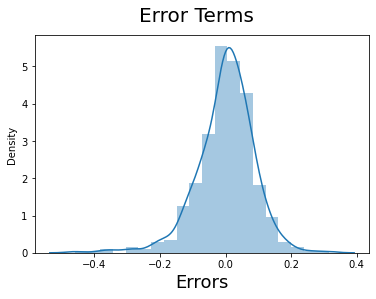

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


From the above plot t has been seen that residuals of training data is following normal distribution. Now make prediction on the test data

# Validating the assumptions of Linear Regression
1. Linear Relationship
2. No Multicollinearity
3. Independence of residuals (absence of auto-correlation)
4. Homoscedasticity- 
5. Normality of Errors

### 1. Linear Relationship
One of the most important assumptions is that a linear relationship is said to exist between the dependent and the 
independent variables. If you try to fit a linear relationship in a non-linear data set, the proposed algorithm won’t 
capture the trend as a linear graph, resulting in an inefficient model. Thus, it would result in inaccurate predictions.

##### How can you determine if the assumption is met?

The simple way to determine if this assumption is met or not is by creating a scatter plot x vs y. If the data points fall on a straight line in the graph, there is a linear relationship between the dependent and the independent variables, and the assumption holds.

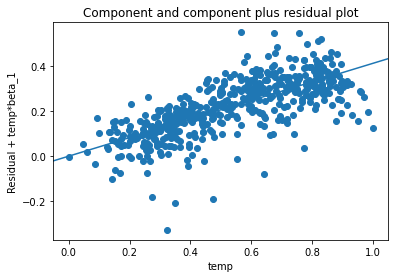

In [57]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lr_model14, 'temp')
plt.show()

The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected.

### 2. No Multicollinearity

The independent variables shouldn’t be correlated. If multicollinearity exists between the independent variables, 
it is challenging to predict the outcome of the model. In essence, it is difficult to explain the relationship between 
the dependent and the independent variables. In other words, it is unclear which independent variables explain the 
dependent variable.

The standard errors tend to inflate with correlated variables, thus widening the confidence intervals leading to 
imprecise estimates.

##### How to determine if the assumption is met?

Use a scatter plot to visualise the correlation between the variables. Another way is to determine the VIF
(Variance Inflation Factor). VIF<=4 implies no multicollinearity, whereas VIF>=10 implies serious multicollinearity.


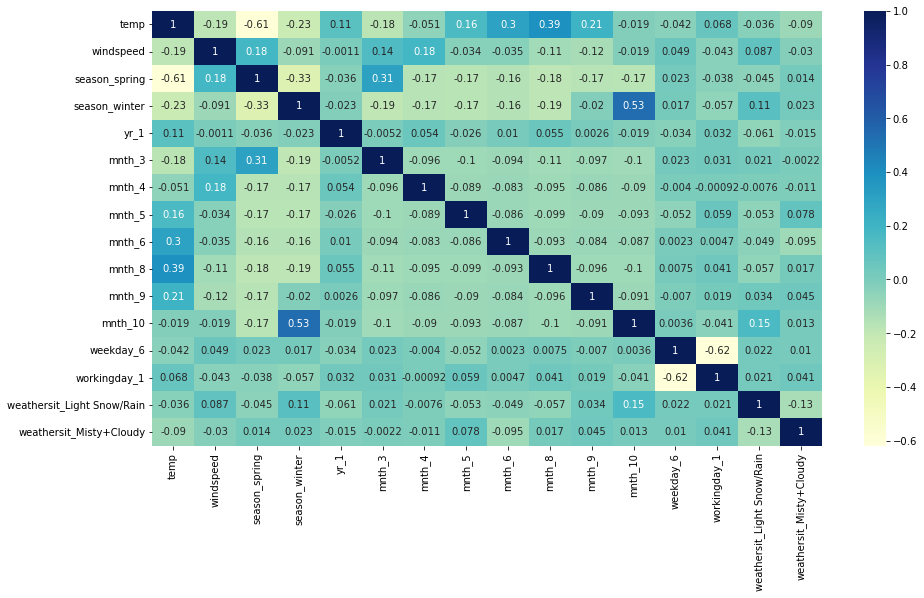

In [58]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

All variables have less than 0.56 correlation with eachother. Checking the VIF now.

In [59]:
print(vif)

                      Features   VIF
0                         temp  8.11
1                    windspeed  4.73
13                workingday_1  4.67
3                season_winter  2.54
2                season_spring  2.35
4                         yr_1  2.09
9                       mnth_8  1.94
12                   weekday_6  1.83
8                       mnth_6  1.68
7                       mnth_5  1.63
11                     mnth_10  1.62
6                       mnth_4  1.57
15     weathersit_Misty+Cloudy  1.57
10                      mnth_9  1.50
5                       mnth_3  1.36
14  weathersit_Light Snow/Rain  1.10


Taking 10 as the maximum VIF permissible for this model, we decide on keeping these colmns based upon business assumptions.

### 3. No auto-correlation or independence
The residuals (error terms) are independent of each other. In other words, there is no correlation between the 
consecutive error terms of the time series data. The presence of correlation in the error terms drastically 
reduces the accuracy of the model. If the error terms are correlated, the estimated standard error tries to 
deflate the true standard error.

###### How to determine if the assumption is met?

Conduct a Durbin-Watson (DW) statistic test. The values should fall between 0-4. If DW=2, no auto-correlation; 
if DW lies between 0 and 2, it means that there exists a positive correlation. If DW lies between 2 and 4, 
it means there is a negative correlation. Another method is to plot a graph against residuals vs time and see 
patterns in residual values.

In [63]:
# Independence of residuals (absence of auto-correlation)
# Autocorrelation refers to the fact that observations’ errors are correlated
# To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
# The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
# (0–2: positive auto-correlation, 2–4: negative auto-correlation)

print('The Durbin-Watson value for Model No.14 is', round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)), 4))

The Durbin-Watson value for Model No.14 is 2.0051


There is almost nill auto-correlation

### 4. Homoscedasticity
Homoscedasticity means the residuals have constant variance at every level of x. The absence of this phenomenon is 
known as heteroscedasticity. Heteroscedasticity generally arises in the presence of outliers and extreme values.

##### How to determine if the assumption is met?
Create a scatter plot that shows residual vs fitted value. If the data points are spread across equally without a 
prominent pattern, it means the residuals have constant variance (homoscedasticity). Otherwise, if a funnel-shaped 
pattern is seen, it means the residuals are not distributed equally and depicts a non-constant variance (heteroscedasticity).

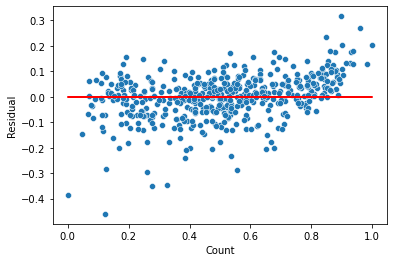

In [61]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable
y_train_pred = lr_model14.predict(X_train_sm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see in the above plot, Homoscedasticity is well respected since the variance of the residuals are almost constant.

### 5. Normal distribution of error terms
The last assumption that needs to be checked for linear regression is the error terms’ normal distribution. 
If the error terms don’t follow a normal distribution, confidence intervals may become too wide or narrow.

##### How to determine if the assumption is met?

Check the assumption using a Q-Q (Quantile-Quantile) plot. If the data points on the graph form a straight diagonal line, 
the assumption is met.
You can also check for the error terms’ normality using statistical tests like the Kolmogorov-Smironov or Shapiro-Wilk test.

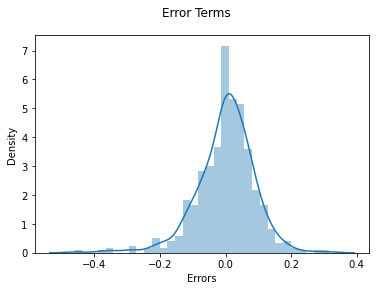

In [62]:
# Normality of Errors
y_train_pred = lr_model14.predict(X_train_sm)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

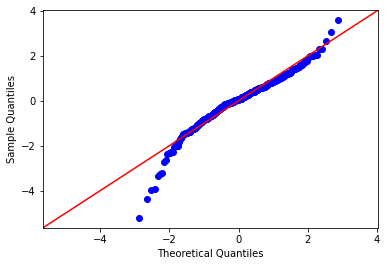

In [64]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

The error terms are normally distributed

## Step 8: Making Predictions Using the Final Model


In [65]:
# Scaling the Test Dataset with the Scaler of the Training Set
cols = df_test.columns
df_test[cols] = scaler.transform(df_test[cols])

In [66]:
# see the transformed data
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.100457,...,0.036530,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.698630,0.027397,0.319635
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.301297,...,0.188034,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.459904,0.163612,0.467403
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# Dividing data into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
X_test.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
184,0.831783,0.769660,0.657364,0.084219,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
535,0.901354,0.842587,0.610133,0.153728,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
299,0.511964,0.496145,0.837699,0.334206,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
221,0.881625,0.795343,0.437098,0.339570,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
152,0.817246,0.741471,0.314298,0.537414,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [69]:
# as in the training data some of the non-significant columns is removed for model building.
# so for test data also we have to remove those columns or filter data only for significant columns
# get the training data final columns
final_columns = X_train.columns

In [70]:
# print the data
X_test[final_columns].head()

,temp,windspeed,season_spring,season_winter,yr_1,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
184,0.831783,0.084219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
535,0.901354,0.153728,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
299,0.511964,0.334206,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
221,0.881625,0.339570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
152,0.817246,0.537414,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
# sub set the test data based on significant columns which is acquired from training data
X_test_m14 = X_test[final_columns]
# Adding the constant column
X_test_m14 = sm.add_constant(X_test_m14)

In [72]:
# Making prediction using Model 14
y_test_pred = lr_model14.predict(X_test_m14)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values of test data

Text(0, 0.5, 'y_test_pred')

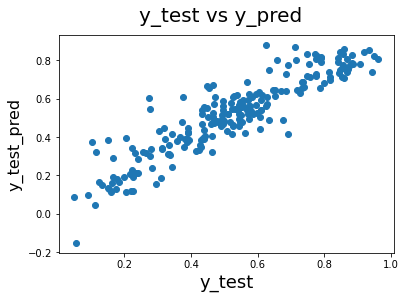

In [73]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  

From the above plot we can see actual and predicted are aligned each other

In [74]:
# Now lets check the r2 and adj-r2 for training and testing data
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print("Training data r2-value : ", r2_train)
print("Testing data r2-value : ", r2_test)

Training data r2-value :  0.8451868255420473
Testing data r2-value :  0.8219243498301338


So as we can see above r2 value for training and testing is near to each other. So we can tell that model is performing good.

The equation of the best fitted line developed by Model 14 is:

$ 𝑐𝑛𝑡=0.1693+(0.4121*temp-0.1544*windspeed-0.0759*season_spring+0.0833*season_winter+0.2352*yr_1+0.0620*mnth_3+0.0705*mnth_4+0.0880*mnth_5+0.0633*mnth_6+0.0512*mnth_8+0.1124*mnth_9+0.0500*mnth_10+0.0651*weekday_6+0.0533*workingday_1-0.2968*weathersit_Light Snow/Rain-0.0838*weathersit_Misty+Cloudy) $


Since the bookings increase on Clear weather days with hotter temperature, the company must increase their bike availibilty and promotions during the summer months to further increase their booking count.

An R-Squared value of 0.82 on the test data signifies that the model is a very good predictor and 82% of the variance is captured by the model.

# Building a linear model using RFE(Recursive feature elimination) and sklearn

As in the above steps i have build the model using manually removing the insignificat varaibles one by one at a time.
Now in below I am building the model using automatic way of removing the insigificant parameters using RFE Method
and build the model using that and see both are giving same kind of accuracy or not

In [75]:
#Dividing into X and Y sets for the model building
y_train = y_train
X_train = df_train

In [76]:
X_train.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
653,0.509887,0.501133,0.575354,0.300794,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,0.815169,0.766351,0.725633,0.264686,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
426,0.442393,0.438975,0.640189,0.255342,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
728,0.245101,0.200348,0.498067,0.663106,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.395666,0.391735,0.504508,0.188475,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [77]:
# as from the manual mode finally we got 16parameters as significant so I am also using same count for RFE model
# Running RFE with the output number of the variable equal to 16
# create linear regression model object and fit train and test data
lm = LinearRegression()
lm.fit(X_train, y_train)

# create rfe object
rfe = RFE(lm, 16)  
# fit the model
rfe = rfe.fit(X_train, y_train)

In [78]:
# print the parameter ranks
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('holiday_1', True, 1),
 ('weekday_1', False, 10),
 ('weekday_2', False, 11),
 ('weekday_3', False, 13),
 ('weekday_4', False, 14),
 ('weekday_5', False, 12),
 ('weekday_6', False, 2),
 ('workingday_1', False, 3),
 ('weathersit_Light Snow/Rain', True, 1),
 ('weathersit_Misty+Cloudy', True, 1)]

In [79]:
# get the only significant params
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_1',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'mnth_10',
       'holiday_1', 'weathersit_Light Snow/Rain', 'weathersit_Misty+Cloudy'],
      dtype='object')

In [80]:
# print insignificant params
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_2', 'mnth_7', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [81]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [82]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [83]:
# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()   

In [84]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sat, 28 May 2022   Prob (F-statistic):          2.88e-188
Time:                        21:21:14   Log-Likelihood:                 515.20
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     493   BIC:                            -924.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [85]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,72.83
4,season_spring,4.18
5,season_winter,3.80
1,temp,3.53
2,hum,1.93
8,mnth_4,1.83
11,mnth_8,1.78
9,mnth_5,1.69
10,mnth_6,1.60
16,weathersit_Misty+Cloudy,1.56


From above VIF table everything is under 5 so all the parameters are siginificant

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [86]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

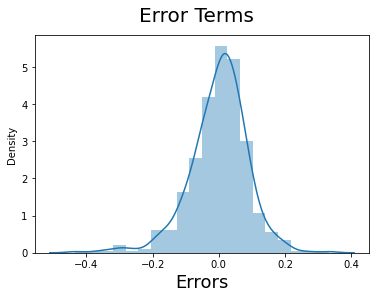

In [87]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above plot its clear that resisuals is following Normal Distribution. So model is good.

# Validating the assumptions of Linear Regression
1. Linear Relationship
2. No Multicollinearity
3. Independence of residuals (absence of auto-correlation)
4. Homoscedasticity- 
5. Normality of Errors

###  1. Linear Relationship
One of the most important assumptions is that a linear relationship is said to exist between the dependent and the 
independent variables. If you try to fit a linear relationship in a non-linear data set, the proposed algorithm won’t 
capture the trend as a linear graph, resulting in an inefficient model. Thus, it would result in inaccurate predictions.

##### How can you determine if the assumption is met?

The simple way to determine if this assumption is met or not is by creating a scatter plot x vs y. If the data points fall on a straight line in the graph, there is a linear relationship between the dependent and the independent variables, and the assumption holds.

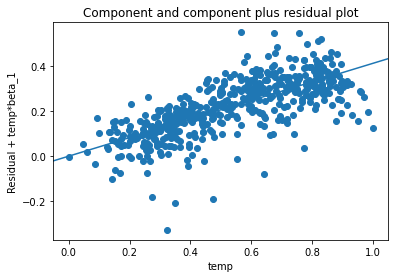

In [88]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lr_model14, 'temp')
plt.show()

The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected.

### 2. No Multicollinearity

The independent variables shouldn’t be correlated. If multicollinearity exists between the independent variables, 
it is challenging to predict the outcome of the model. In essence, it is difficult to explain the relationship between 
the dependent and the independent variables. In other words, it is unclear which independent variables explain the 
dependent variable.

The standard errors tend to inflate with correlated variables, thus widening the confidence intervals leading to 
imprecise estimates.

##### How to determine if the assumption is met?

Use a scatter plot to visualise the correlation between the variables. Another way is to determine the VIF
(Variance Inflation Factor). VIF<=4 implies no multicollinearity, whereas VIF>=10 implies serious multicollinearity.


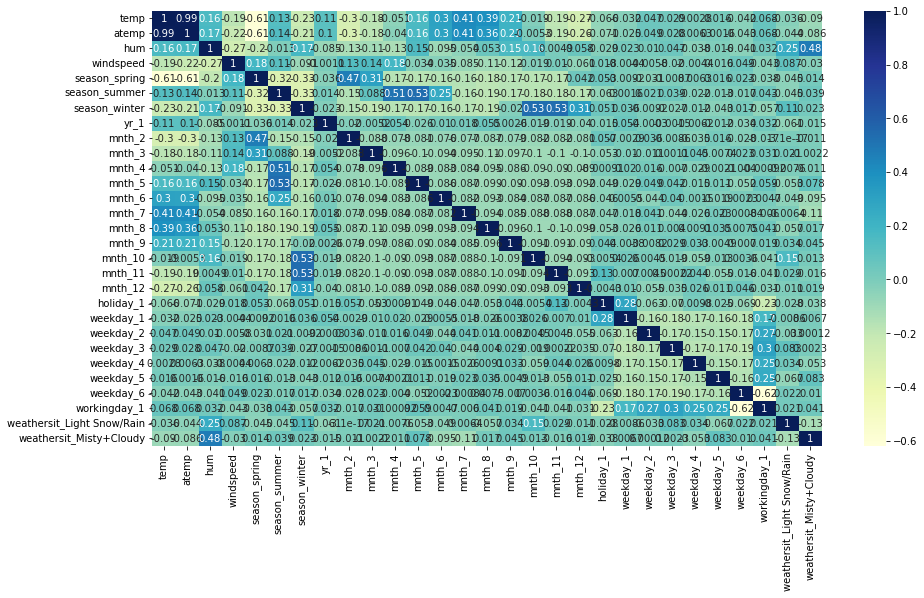

In [89]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

All variables have less than 0.56 correlation with eachother. Checking the VIF now.

In [90]:
print(vif)

                      Features    VIF
0                        const  72.83
4                season_spring   4.18
5                season_winter   3.80
1                         temp   3.53
2                          hum   1.93
8                       mnth_4   1.83
11                      mnth_8   1.78
9                       mnth_5   1.69
10                      mnth_6   1.60
16     weathersit_Misty+Cloudy   1.56
13                     mnth_10   1.53
12                      mnth_9   1.42
7                       mnth_3   1.26
15  weathersit_Light Snow/Rain   1.26
3                    windspeed   1.21
6                         yr_1   1.04
14                   holiday_1   1.02


Taking 10 as the maximum VIF permissible for this model, we decide on keeping these colmns based upon business assumptions.

### 3. No auto-correlation or independence
The residuals (error terms) are independent of each other. In other words, there is no correlation between the 
consecutive error terms of the time series data. The presence of correlation in the error terms drastically 
reduces the accuracy of the model. If the error terms are correlated, the estimated standard error tries to 
deflate the true standard error.

###### How to determine if the assumption is met?

Conduct a Durbin-Watson (DW) statistic test. The values should fall between 0-4. If DW=2, no auto-correlation; 
if DW lies between 0 and 2, it means that there exists a positive correlation. If DW lies between 2 and 4, 
it means there is a negative correlation. Another method is to plot a graph against residuals vs time and see 
patterns in residual values.

In [91]:
# Independence of residuals (absence of auto-correlation)
# Autocorrelation refers to the fact that observations’ errors are correlated
# To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
# The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
# (0–2: positive auto-correlation, 2–4: negative auto-correlation)

print('The Durbin-Watson value for Model No.19 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Model No.19 is 1.9925


There is almost nill auto-correlation

### 4. Homoscedasticity
Homoscedasticity means the residuals have constant variance at every level of x. The absence of this phenomenon is 
known as heteroscedasticity. Heteroscedasticity generally arises in the presence of outliers and extreme values.

##### How to determine if the assumption is met?
Create a scatter plot that shows residual vs fitted value. If the data points are spread across equally without a 
prominent pattern, it means the residuals have constant variance (homoscedasticity). Otherwise, if a funnel-shaped 
pattern is seen, it means the residuals are not distributed equally and depicts a non-constant variance (heteroscedasticity).

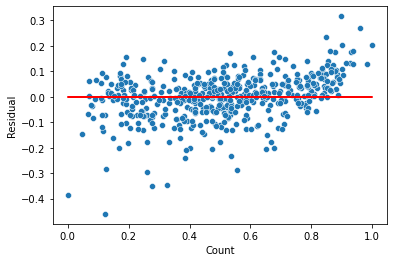

In [92]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable
y_train_pred = lr_model14.predict(X_train_sm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see in the above plot, Homoscedasticity is well respected since the variance of the residuals are almost constant.

### 5. Normal distribution of error terms
The last assumption that needs to be checked for linear regression is the error terms’ normal distribution. 
If the error terms don’t follow a normal distribution, confidence intervals may become too wide or narrow.

##### How to determine if the assumption is met?

Check the assumption using a Q-Q (Quantile-Quantile) plot. If the data points on the graph form a straight diagonal line, 
the assumption is met.
You can also check for the error terms’ normality using statistical tests like the Kolmogorov-Smironov or Shapiro-Wilk test.

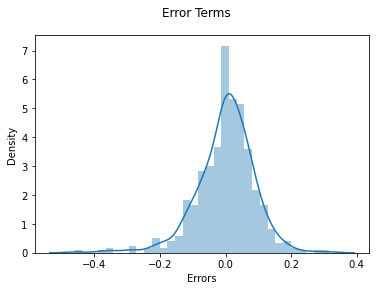

In [93]:
# Normality of Errors
y_train_pred = lr_model14.predict(X_train_sm)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

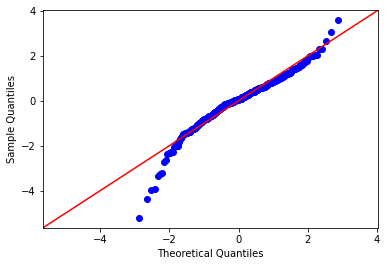

In [94]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

The error terms are normally distributed

## Making Predictions Using the Final Model

In [95]:
# see the transformed data
df_test.describe()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.255708,0.264840,0.232877,0.479452,0.100457,0.054795,...,0.036530,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.698630,0.027397,0.319635
std,0.233698,0.217888,0.148974,0.159947,0.437258,0.442259,0.423633,0.500722,0.301297,0.228100,...,0.188034,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.459904,0.163612,0.467403
min,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
# Dividing data into X_test and y_test
y_test = y_test
X_test = df_test

In [97]:
X_test.head()

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_2,mnth_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
184,0.831783,0.769660,0.657364,0.084219,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
535,0.901354,0.842587,0.610133,0.153728,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
299,0.511964,0.496145,0.837699,0.334206,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
221,0.881625,0.795343,0.437098,0.339570,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
152,0.817246,0.741471,0.314298,0.537414,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [98]:
# as in the training data some of the non-significant columns is removed for model building.
# so for test data also we have to remove those columns or filter data only for significant columns
# get the training data final columns
final_columns = list(X_train_rfe.columns)
final_columns.remove("const")

In [99]:
# print the data
X_train_rfe[final_columns].head()

,temp,hum,windspeed,season_spring,season_winter,yr_1,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,holiday_1,weathersit_Light Snow/Rain,weathersit_Misty+Cloudy
653,0.509887,0.575354,0.300794,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
576,0.815169,0.725633,0.264686,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426,0.442393,0.640189,0.255342,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,0.245101,0.498067,0.663106,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,0.395666,0.504508,0.188475,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [100]:
# sub set the test data based on significant columns which is acquired from training data
X_test_rfe = X_test[final_columns]
# Adding the constant column
X_test_rfe = sm.add_constant(X_test_rfe)

In [101]:
# Making prediction using Model
y_test_pred = lm.predict(X_test_rfe)

## Model Evaluation

Let's now plot the graph for actual versus predicted values of test data

Text(0, 0.5, 'y_test_pred')

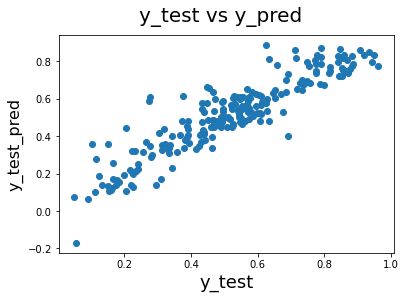

In [102]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  

From the above plot we can see actual and predicted are aligned each other

In [103]:
# Now lets check the r2 and adj-r2 for training and testing data
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print("Training data r2-value : ", r2_train)
print("Testing data r2-value : ", r2_test)

Training data r2-value :  0.8451868255420473
Testing data r2-value :  0.8287662277653296


So as we can see above r2 value for training and testing is near to each other. So we can tell that model is performing good.

The equation of the best fitted line developed by Model 14 is:

$ 𝑐𝑛𝑡=0.3031+(0.4385*temp-0.1620*hum-0.1823*windspeed-0.0699*season_spring+0.0949*season_winter+0.2313*yr_1+0.0628*mnth_3+0.0703*mnth_4+0.0983*mnth_5+0.0586*mnth_6+0.0548*mnth_8+0.1221*mnth_9+0.0488*mnth_10-0.0859*holiday_1-0.2481*weathersit_Light Snow/Rain-0.0567*weathersit_Misty+Cloudy) $


## Final Conclusion

From the above two models we build one using manual elimination of insginificant parameters and other using RFE method of
eliminating insginificant parameters it is observed that both models is having same accuracy of r2 values for traing and test data.

Since the bookings increase on Clear weather days with hotter temperature, the company must increase their bike availibilty and promotions during the summer months to further increase their booking count.

An R-Squared value of 0.82 on the test data signifies that the model is a very good predictor and 82% of the variance is captured by the model.